In [1]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#%cd /content/drive/My Drive/pytorch-openpose-master/python
%cd /content/drive/My Drive/Colab Notebooks/prediction clasification head or chest/pytorch-openpose-master/python
# List files to make sure we're in the expected directory.
# Your output will look different, showing your own Drive files here.
!ls

/content/drive/My Drive/Colab Notebooks/prediction clasification head or chest/pytorch-openpose-master/python
1.jpg			     hand.py	  REBAestadisticas.py
body.py			     model.py	  ski.jpg
hand_model_output_size.json  __pycache__  util.py
hand_model_outputsize.py     reba2.png


In [3]:
import sys
#from: https://github.com/Hzzone/pytorch-openpose
#sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/prediction clasification head or chest/pytorch-openpose-master/python/util.py')
sys.path.insert(0, '../python')
import cv2
import util
from REBAestadisticas import *
from hand import Hand
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np
np.set_printoptions(threshold=np.inf)
import math
import time
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib
from model import bodypose_model
import torch
from PIL import Image as PImage
import os
from PIL import Image
from torchvision import transforms
from fastai.vision import *
from fastai.metrics import *

body_estimation = Body('../model/body_pose_model.pth')

test_image = '../images/case_b.png'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset = body_estimation(oriImg)
# subset: n*20 array, 0-17 is the index in candidate, 18 is the total score, 19 is the total parts
# candidate: x, y, score, id
print(subset)

[[ 0.        1.        2.        3.       -1.        5.        6.        7.        8.        9.       12.
  13.       14.       16.       -1.       18.       19.       20.       21.324845 16.      ]]


Load Classifier from Fast ai.
is possible to choose depending of the user and resources.

In [0]:
learn_cuerpo = load_learner("../model/cuerpo",
                                    "trained_model2export_2_models_resnet180.pkl")
learn_cabeza = load_learner("../model/cabeza",
                                    "trained_model2export_2_models_resnet180.pkl")

Test Classifiers

In [5]:
filename33 = "../images/hardhat.jpg"
img33 = cv2.imread(filename33)
# testing
image2 = img33.copy()
image4 = image2 / 255.0
img4 = vision.Image(pil2tensor(image4, np.float32))
pred_class_cabeza, pred_idx_cabeza, _cabeza = learn_cabeza.predict(img4)
print(pred_class_cabeza)


filename33 = "../images/hvs2.jpg"
img33 = cv2.imread(filename33)
image2 = img33.copy()
image4 = image2 / 255.0
img4 = vision.Image(pil2tensor(image4, np.float32))
pred_class_cuerpo, pred_idx_cuerpo, outputs_cuerpo = learn_cuerpo.predict(img4)
print(pred_class_cuerpo)

hardhat
chest


Test All *together*

confidence 0.9247227840953403
size 390
Statistics=nan, p=nan
Different distributions (reject H0)
resultado 4
Risk level: Medium
Source: Rapid Entire Body Assessment (REBA) S. Hignett, L. McAtamney / Applied Ergonomics 31 (2000)
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
confidence 0.8955246872372098
size 390
Statistics=nan, p=nan
Different distributions (reject H0)
resultado 4
Risk level: Medium
Source: Rapid Entire Body Assessment (REBA) S. Hignett, L. McAtamney / Applied Ergonomics 31 (2000)
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
confidence 0.8689450224240621
size 390
Statistics=nan, p=nan
Different distributions (reject H0)
resultado 5
Risk level: Medium
Source: Rapid Entire Body Assessment (REBA) S. Hignett, L. McAtamney / Applied Ergonomics 31 (2000)
<class 'Exception'>
<class 'Exceptio

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


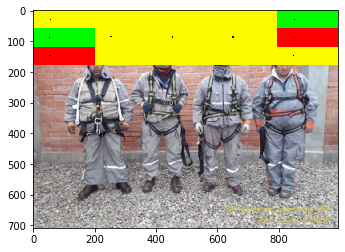

In [11]:
    test_image = '../images/case_b.png'
    test_image= "/content/drive/My Drive/Colab Notebooks/test_drone/cut2.jpg"
    filename0=test_image
    img = cv2.imread(test_image)  # B,G,R order
    candidate, subset = body_estimation(img)

    height, width = img.shape[:2]
    arr = hacer_lista(subset,candidate)

    img,datab = REBA(img, arr,tables = [3, 3, 3, 3, 3, 3, 2, 3, 2])
    img=img[..., ::-1]
    plt.imshow(img)
    plt.show()

confidence 0.703220882349544
size 386
222 366 789 890
118 228 780 890
hardhat
confidence 0.7227537996239133
size 386
229 368 588 687
119 229 585 695
hardhat
confidence 0.6392904304795795
size 386
229 372 164 270
114 230 156 272
hardhat
confidence 0.6991876148515277
size 386
220 363 386 487
101 221 375 495
hardhat


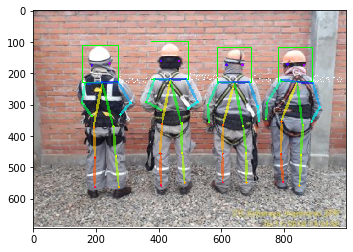

In [18]:
def epp(img):
    test_image = '/content/drive/My Drive/Colab Notebooks/test_drone/cut_back.jpg'
    #test_image = '/content/drive/My Drive/Colab Notebooks/figures/video_noche/youtube_YOUTUBE_4aqeLCngEK_1400_resnet18.jpg'
    filename0=test_image
    img = cv2.imread(test_image)
    #img = img[..., ::-1]  # B,G,R order
    candidate, subset = body_estimation(img)

    height, width = img.shape[:2]
    arr = hacer_lista(subset,candidate)

    datab = []
    chest=0
    a=0
    img2=img.copy()
    for j in range(len(arr)):
            a+=1
            arr2 = [row[2] for row in arr[j]]
            meanpnarr2 = np.nanmean(arr2)
            print("confidence "+str(meanpnarr2))

            if meanpnarr2 < 0.010:
                print(str(j) + " Low confidence: " + str(meanpnarr2))
                continue
            arr2 = [row[1] for row in arr[0] if row[1] != 0]
            #arr2 = arr2[arr2 != 0]
            minarr2 = int(max(arr2)) - int(min(arr2))
            print("size "+str(minarr2))

            if minarr2 < height * 0.1:
                print(str(j) + "Low size: " + str(minarr2))
                continue

            lefthombro = arr[j][2]
            righthombro = arr[j][5]
            nose = arr[j][0]
            neck = arr[j][1]
            leftCadera = arr[j][8]
            rightCadera = arr[j][11]
            leftOido = arr[j][16]
            rightOido = arr[j][17]

            """ ojo aqui con center cadera"""
            #centerCadera = arr[j][8]

            if leftCadera[2] > 0.1:
                if rightCadera[2] > 0.1:
                    centerCadera = [int((leftCadera[0] + rightCadera[0]) / 2), int((leftCadera[1] + rightCadera[1]) / 2),
                                   float((leftCadera[2] + rightCadera[2]) / 2)]
                else:
                    centerCadera = leftCadera
            else:
                if rightCadera[2] > 0.1:
                    centerCadera = rightCadera
                else:
                    centerCadera = [0, 0, 0]


            centerCadera = centerCadera
            neck = neck
            if leftOido[2] > 0.1:
                if rightOido[2] > 0.1:
                    promOido = (int((leftOido[0] + rightOido[0]) / 2), int((leftOido[1] + rightOido[1]) / 2),
                                float((leftOido[2] + rightOido[2]) / 2))
                else:
                    promOido = leftOido
            else:
                if rightOido[2] > 0.1:
                    promOido = rightOido
                else:
                    promOido = [0, 0, 0]

            if righthombro[2] * lefthombro[2] * rightCadera[2] * leftCadera[2] > 0.2:
                d1 = distancia(righthombro, leftCadera)  # *2
                d2 = distancia(lefthombro, rightCadera)

                if d1 > 12 and d2 > 12:
                    # d=128
                    name, extension = os.path.splitext(filename0)
                    chest += 1

                    x0, x1 = int(min([righthombro[0], lefthombro[0], rightCadera[0], leftCadera[0]])), int(
                        max([righthombro[0], lefthombro[0], rightCadera[0], leftCadera[0]]))  # "x
                    y0, y1 = int(min([righthombro[1], lefthombro[1], rightCadera[1], leftCadera[1]])), int(
                        max([righthombro[1], lefthombro[1], rightCadera[1], leftCadera[1]]))  # "y" int(i[1])# "height"
                    print(y0, y1, x0, x1)
                    img33 = img[y0:y1, x0:x1, :]
                    # trainig
                    
                    # testing
                    image2 = img33.copy()
                    image4 = image2 / 255.0
                    img4 = 0
                    #image4 = PImage.fromarray(image4)
                    img4 = vision.Image(pil2tensor(image4, np.float32))

                    """try:"""
                    if True:

                        pred_class, pred_idx, outputs = learn_cuerpo.predict(img4)
                        filename33 = name+"_"+str(pred_class.obj)+"_" + str(a) + ".jpg"
                        cv2.imwrite(filename33, img33)

                        # cv2.namedWindow("ss", cv2.WINDOW_NORMAL)
                        # cv2.imshow("ss", img)
                        print(pred_class)

                        if pred_class.obj == 'hvs':


                            r = image2.copy()
                            # set blue and green channels to 0
                            r[:, :, 0] = 0
                            r[:, :, 1] = 0
                            image2 = r
                            # cv2.imshow("",r)
                            #  color in BGR
                            color = (0, 255, 0)
                            # img2 = cv2.rectangle(img2.astype(np.int32), (100, 100), (200,200), color, 20)
                            img2 = cv2.rectangle(img2.astype(np.int32), (x0, y0), (x1, y1), color, 2)
                            img2 = cv2.putText(img2, 'Chaleco', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255))
                            # rr, cc = rectangle_perimeter((y0,x0 ), end=(y1, x1), shape=img2.shape)
                        # else:
                        if pred_class.obj == 'chest':


                            g = image2.copy()
                            g[:, :, 0] = 0
                            g[:, :, 2] = 0

                            image2 = g
                            color = (0, 0, 255)
                            # rr, cc = rectangle_perimeter(start, end=end, shape=img.shape)
                            img2 = cv2.rectangle(img2.astype(np.int32), (x0, y0), (x1, y1), color, 2)
                            img2 = cv2.putText(img2, 'NCH', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255))
                            # rr, cc = rectangle_perimeter( (x0, y0), end=(x1, y1), shape=img2.shape)
                    """except:
                        print("error")
                        """
                    if promOido[2] > 0.2:
                        d = distancia(promOido, neck)  # *2
                        if d > 12:
                            # d=128
                            name, extension = os.path.splitext(filename0)
                            # fold = image_folder.split("/")[-1]

                            a += 1
                            i = [promOido[0], promOido[1], d]
                            width = int(i[2])  # "width"
                            height = int(i[2])
                            x0, x1 = int(min(abs(i[0] - width), i[0] + width)), int(max(i[0] - width, i[0] + width, 0))  # "x"
                            y0, y1 = int(min(abs(i[1] - height), i[1] + height)), int(
                                max(i[1] - height, i[1] + height, 0))  # "y" int(i[1])# "height"
                            print(y0, y1, x0, x1)
                            img33 = img[y0:y1, x0:x1, :]
                            # trainig

                            if True:
                                image2 = img33.copy()
                                image4 = image2 / 255.0
                                img4 = vision.Image(pil2tensor(image4, np.float32))

                                pred_class, pred_idx, outputs = learn_cabeza.predict(img4)

                                # cv2.namedWindow("ss", cv2.WINDOW_NORMAL)
                                # cv2.imshow("ss", img)
                                print(pred_class)
                                filename33 = name+"_"+str(pred_class.obj)+"_" + str(a) + ".jpg"
                                cv2.imwrite(filename33, img33)

                                if pred_class.obj == 'hardhat':


                                    r = image2.copy()
                                    # set blue and green channels to 0
                                    r[:, :, 0] = 0
                                    r[:, :, 1] = 0
                                    image2 = r
                                    #cv2.imshow("",r)
                                    #  color in BGR
                                    color = (0, 255, 0)
                                    # img2 = cv2.rectangle(img2.astype(np.int32), (100, 100), (200,200), color, 20)
                                    img2 = cv2.rectangle(img2.astype(np.int32), (x0, y0), (x1, y1), color, 2)
                                    img2 = cv2.putText(img2, 'Casco', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
                                                      (255, 255, 255))
                                    # rr, cc = rectangle_perimeter((y0,x0 ), end=(y1, x1), shape=img2.shape)
                                # else:
                                if pred_class.obj == 'head':

                                    g = image2.copy()
                                    g[:, :, 0] = 0
                                    g[:, :, 2] = 0

                                    image2 = g
                                    color = (0, 0, 255)
                                    # rr, cc = rectangle_perimeter(start, end=end, shape=img.shape)
                                    img2 = cv2.rectangle(img2.astype(np.int32), (x0, y0), (x1, y1), color, 2)
                                    img2 = cv2.putText(img2, 'NC', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255))
                                    # rr, cc = rectangle_perimeter( (x0, y0), end=(x1, y1), shape=img2.shape)
                            """except:
                                print("error2")
                                """




    #img2 = img2[..., ::-1]
    #plt.imshow(img2)
    #plt.show()
    canvas = util.draw_bodypose(img2, candidate, subset)
    plt.imshow(canvas[:, :, [2, 1, 0]])
    plt.show()
    img3=canvas[:, :, [2, 1, 0]][..., ::-1]
    cv2.imwrite(test_image[:-4]+"_completa.jpg",img3)
    return(img3)
img2=epp(img)

In [0]:
!pip install imageio
!pip install pims

In [0]:
import imageio
videoname='/content/drive/My Drive/Colab Notebooks/carpeta_validacion/youtube_YOUTUBE_ID.mp4'
reader = imageio.get_reader(videoname)
fps = int(reader.get_meta_data()['fps']/3)

writer = imageio.get_writer(videoname[:-4]+'_result1.mp4', fps=fps)
s=0
a=1
for img in reader:
    s+=1
    a+=1
    if s%1==10:
      im=epp(img)
      writer.append_data(im)
      cv2.imshow(im)
      cv2.imwrite(videoname[:-4]+"_"+str(s)+"_"+str(a)+"_completa_resnet181.jpg",im)#[..., ::-1]
      
writer.close()

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/Colab Notebooks/video/youtube_YOUTUBE_4CExmuZBJ_U.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()